In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math
from astro310 import *

#plot_defaults()

In [31]:
LSUN = 3.83E26
RSUN = 6.96E8
MSUN = 1.99E30

G = 6.67E-11
SIGMA = 5.67E-8

In [32]:
starH = read_history('ezweb_10Msun.zip')
starP = read_profile('ezweb_10Msun.zip', 1)

In [33]:
help(read_history)
help(read_profile)

Help on function read_history in module astro310:

read_history(filename)
    Read history data from an EZ-Web output zip file
    
    Parameters
    ----------
    
    filename : string giving name of zip file
    
    Returns
    -------
    
    data: dictionary containing the history data. The following keys/values 
          appear in the dictionary:
    
        i         step index (gives index of corresponding profile)
        t         age (years)
        M         mass (Msun)
        log_L     log10(luminosity / Lsun)
        log_R     lop10(radius / Rsun)
        logT_s    log10(surface temperature / K)
        log_T_c   log10(central temprature / K)
        log_rho_c log10(central density / kg/m^3)
        log_P_c   log10(central pressure / N/m^2)
        Psi_c     central electron degeneracy parameter
        X_c       central hydrogen mass fraction
        Y_c       central helium mass fraction
        X_Cc      central carbon mass fraction
        X_Nc      central nit

In [34]:
#Determining step # where ~25% of hydrogen remains

hydrogen_mf = starH['X_c']

step = 0
for i in range(100):
    if hydrogen_mf[i] < 0.25:
        step = i
        break
    else:
        step = i
        
print(step)

80


In [64]:
#Demonstrating that the star is in hydrostatic equilibrium during this step number
#dP/dm = -Gm/4pir^4 

mass = starP['m']*MSUN
radius = starP['r']*RSUN
P = starP['P']
nu, c = np.polyfit(mass, P, 1) #fits the curve for dP/dm

G_pressure = (-G*mass[80])/(4*math.pi*(radius[80]**4))

print(G_pressure)
print(nu, c)

-1.45968369983e-16
-1.60541945528e-16 2.90472928595e+15


In [43]:
#The value of G_pressure and nu are almost equal, implying that the system is in hydrostatic equilibrium

In [76]:
data = np.genfromtxt('adopt2.csv', skip_header=1, delimiter=',')

In [110]:
#The degree of ionization is x = n+ / n0 + n+ where n+ = ne
#n+ * ne / n0 = n+^2 / n0 = g/h^3 * (2pimekT)^(3/2) * e^(-X/kT)
e = 2.718
n_o = 1e20
g = 1
h = 6.63e-34
k = 1.38e-23
m_e = 9.11e-31
X = 2.17896e-18 #converted to Joules
T = data[:,5]
n_plus = []

for i in range(32):
    n_plus.append((((g*n_o)/(h**3)) * (2*math.pi*m_e*k*T[i])**(3/2) * e**(-X/(k*T[i])))**(1/2))
    
x = []

for i in range(32):
    x.append(n_plus[i] / (n_plus[i] + n_o))

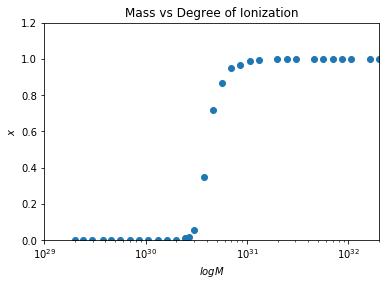

In [122]:
plt.scatter(data[:,2]*MSUN, x)
#plt.yscale('log')
plt.xscale('log')
plt.xlim(1e29, 2e32)
plt.ylim(0, 1.2)
plt.xlabel(r'$log M$')
plt.ylabel(r'$x$')
plt.title(r'Mass vs Degree of Ionization')
plt.savefig('mass_vs_ionization.pdf')

In [ ]:
#Neutral hydrogen begins to disappear from the photosphere around a mass of ~10^31 where x~1

In [ ]:
#A version of the CNO cycle involving O, F, and Ne as catlysts to turn H in to He would look like the following:

#16O + H > gamma + 17F
#17F > e+ + nutrino + 17O
#17O + H > gamma + 18F
#18F + H > gamma + 19Ne
#19Ne > He + 17O
#17O > e+ + nutrino + 16O

In [60]:
#L=M^(3-5)
#R=M^~0.8
Mnew = 0.8 #in units of Msun
Lnew = Mnew**3.5
Rnew = Mnew**0.8 #in units of Rsun

print(Lnew)
print(Rnew)

0.457946721791957
0.8365116420730186


In [61]:
#t~M/L*expected lifetime of the sun (10 million), represented is the amount of "fuel" divided by the rate of use of "fuel"
t = (Mnew/Lnew)*10e9

print(t) #Presents expected lifetime of 0.8Msun star in years

17469281074.217106


In [65]:
#sigma*Teff^4 = L/4piR^2
Teff = ((Lnew*LSUN) / (4*math.pi*((Rnew*RSUN)**2)*SIGMA))**(1/4)

print(Teff) #In K

#Teff~0.3cm/lambda max

L_max = 0.3/Teff

print(L_max)

5191.162056306777
5.7790528738267376e-05


In [66]:
#Evaluating the value of L_max and converting to nm, the wavelength ends up being located in the middle of the yellow part of the
#visable spectrum

In [72]:
Iobs = 3e-14
#L=4pi d^2 Iobs
d = ((Lnew*LSUN)/(4*math.pi*Iobs))**(1/2)
#d = 1/p
p = 1/(d/3.26)

print(d/3.26) #in pc
print(p) #in arcsec

6.61642973550001e+18
1.5113891327743827e-19


In [ ]:
#After reserching the GAIA mission, it seems that the spacecraft can observe parallax at the smallest amount of about
#6.7e-6 arcsec, which is far larger than that calculated above. This means the the GAIA mission would not be able to observe
#our star here. 